# Dataset visualisation
In this notebook we will review the data contained in the NBV classification dataset

In [4]:
import numpy as np
from random import randint
import os
import matplotlib.pyplot as plt
import cnbv
from torch.utils import data

In [5]:
# # configure the dataset address
# dataset_folder = '../dataset/classification/training/'

In [6]:
device = 'cuda:0'
mydir = 'dataset'
dataset = cnbv.Dataset_NBV_Classification(dataset_dir=mydir, device=device)
train_dataset, test_dataset = dataset.generate_train_test()
train_dataloader = data.DataLoader(dataset=train_dataset, shuffle=True, batch_size=16)
test_dataloader = data.DataLoader(dataset=test_dataset, shuffle=True, batch_size=16)

## The grids

The inputs are probabilistic grids represented by a single vector. The vector must be reshaped to 32 x 32 x 32 to make it sense as a 3D grid. The grids are not related with coordinates.

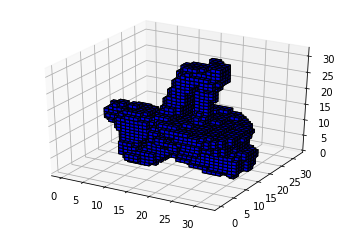

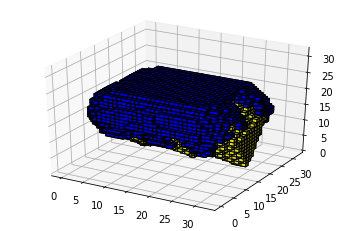

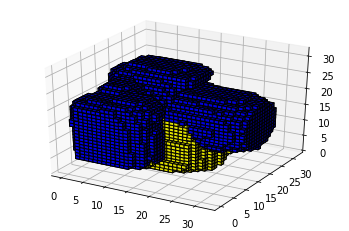

In [10]:
#lets draw some grids

for i in range(3):
    X, y = train_dataset[i]
    cnbv.showGrid(X.cpu().numpy())

## The Labels

In [6]:
# The Labels are indices that correspond to a position around the object

file_lbl = 'dataset_lbl_classification_training.npy'

path_input_lbl = os.path.join(dataset_folder, file_lbl)
dataset_lbl = np.load(path_input_lbl)
print("Labels data size: \n",dataset_lbl.shape)
classes = np.unique(dataset_lbl)
print("Available clases: n", classes)

Labels data size: 
 (10764, 1)
Available clases: n [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]


In [7]:
# Read the pose that corresponds to a class.
# such poses are the vertices of an icosahedron
nbv_positions = np.genfromtxt('points_in_sphere.txt')

# This function converts a class to its corresponding pose
def getPositions(nbv_class, positions):
    return np.array(positions[nbv_class])

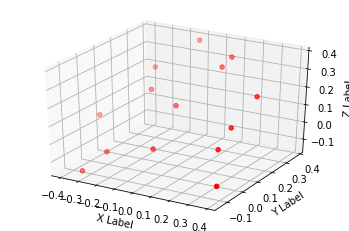

In [8]:
# Let's draw all the poses that correspond to the given classes

positions = getPositions(classes, nbv_positions)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(positions[:,1], positions[:,2], positions[:,2], color='red')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

[ 0.008172 -0.39539   0.06    ]


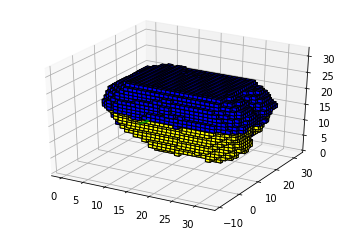

[ 0.287914 -0.211437  0.18    ]


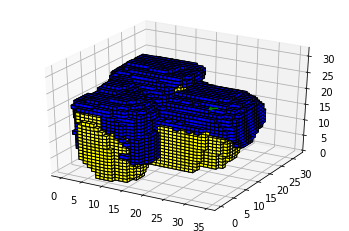

[-0.372509 -0.040464  0.14    ]


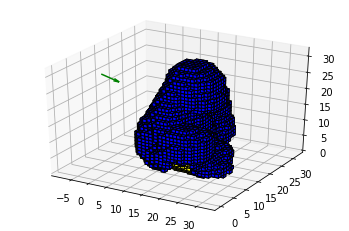

In [9]:
# draw the some grids with nbv examples
for i in range(3):
    idx = randint(0, len(dataset_vol))
    print(getPositions(dataset_lbl[idx], nbv_positions)[0])
    cnbv.showGrid(dataset_vol[idx], getPositions(dataset_lbl[idx], nbv_positions)[0])